In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
def f_003_08(v, F, p):

    CpA, CpB, DHr1, DHr2, CpC, Cao, Ua, Tj, \
    E1, E2, To, R = p

    Fa, Fb, Fc, T = F
    

    #
    Ftot = Fa + Fb + Fc 
    Co = Cao 
    Ca = Co * Fa/Ftot * (To/T) 
    #
    #
    k1 = 10 * np.exp((E1/R)*(1/300-1/T)) 
    k2 = 0.09 * np.exp((E2/R)*(1/300-1/T)) 
    rA1 = - k1 * Ca 
    rA2 = - k2 * Ca**2 
    #
    # dFa/dV
    dFa_dV = rA1 + rA2 
    # dFb/V = 
    dFb_dV = - rA1 
    # dFc/V = 
    dFc_dV = - rA2/2 
    # dT/dV
    dT_dV = (Ua*(Tj-T) + DHr1 * rA1 + DHr2 * rA2)/ \
    (Fa * CpA + Fb * CpB + Fc * CpC) 

    return [dFa_dV, dFb_dV, dFc_dV, dT_dV]

# Data

In [4]:
To = 150 + 273.15    # Temperatura de alimentacion, C
CpA = 90             # Cp de A, J/mol/C
CpB = 90             # Cp de B, J/mol/C
CpC = 180            # Cp de C, J/mol/C
Cao = 0.1            # Concentracion inicial de A en mol/m3
Fao = 100
#
# Datos de la cinetica de la reaccion
#
E1 = 8000 * 4.18  # J/mol
E2 = 18000 * 4.18  # J/mol
R = 8.314 
DHr1 = -20000    # Calor de reaccion por mol de A reaccionado, J/mol A
DHr2 = -60000    # Calor de reaccion por mol de A reaccionado, J/mol A

# Datos del intercambiador de calor
Ua = 4000  # J/m^3 s C
Tj = 100 + 273.15  # K

vVr = [0, 1] 
ics = [Fao, 0, 0, To] 

parametros = [CpA, CpB, DHr1, DHr2, CpC, Cao, Ua, Tj, E1, E2, To, R] 
fun = lambda v, y: f_003_08(v, y, parametros)
solution = solve_ivp(fun, vVr, ics, t_eval=np.linspace(0, 1, 100))


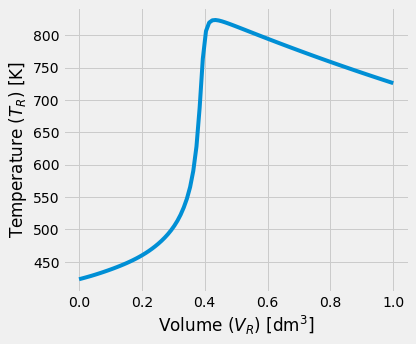

In [5]:
plt.figure(figsize=(6, 5))
plt.plot(solution.t, solution.y[3]) 
plt.xlabel('Volume ($V_R$) [dm$^3$]') 
plt.ylabel('Temperature ($T_R$) [K]')
plt.tight_layout()
plt.show()

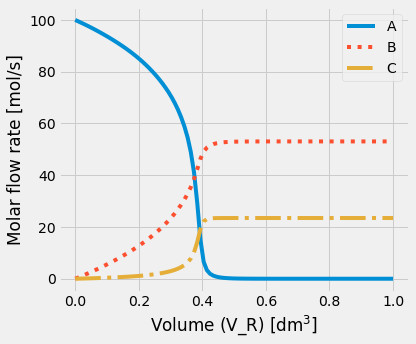

In [6]:
labels = ['A', 'B', 'C']
lss = ['-', ':', '-.']

fig, ax = plt.subplots(figsize=(6, 5))
for i, (label, ls) in enumerate(zip(labels, lss)):
    ax.plot(solution.t, solution.y[i], label=label, ls=ls)

ax.set_xlabel('Volume (V_R) [dm$^3$]') 
ax.set_ylabel('Molar flow rate [mol/s]') 
plt.legend(loc=0, title_fontsize='small')
plt.tight_layout()
plt.show()
